# Customer 데이터셋 분석 With python, pandas, seaborn

-----

- 함수 및 클래스 코드에 집중
    1) 클래스 및 함수를 사용해, 비슷한 종류의 데이터가 들어올 때, 같은 분석을 할 수 있게끔 정규화도 해보았습니다.
    
- EDA와 p-value, kmean 방법을 가지고 분석
    1) csv 파일을 pandas를 사용해 불러온 뒤, 각 columns와 counts에 대한 그래프를 그리고, 분석. 필요한 경우, pie차트를 도입해 비율을 더 보기 편하도록 변경. 예를 들어, 데이터의 종류가 숫자가 아닌 경우, 또는 숫자더라도 2개의 숫자만 존재하는 경우에 대해 pie차트를 그리고, 비율을 표시해 좀 더 직관적으로 변경했습니다.
    2) EDA를 통해 각 column의 correlation 파악
    3) kmean을 사용해, customer의 여러 케이스를 그룹화



----

## 1.1) 데이터에 관하여
처음에는 Customer Segmentation: K-Means Clustering & A/B Testing 페이지의, Kaggle dataset을 하려고 했으나, 흥미가 생기지 않았습니다.

#### Kaggle의 다른 dataset인 Lifestyle_and_Wellbeing_Data을 선정 했습니다.
- 15997 개의 설문지 응답을 기반으로 한 데이터입니다. 24개의 항목을 가지고 설문해, 우리가 어떤 삶을 사는지에 대해서 조사했습니다.
- 데이터는 총 15997행, 25열로 구성되어있습니다.

설문 항목은 다음과 같은 기준으로 선정 되었습니다.
1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.

데이터의 열은 24개 항목과 1개의 타임스탬프로 구성되었습니다. 타임스탬프를 제외하고는, 점수로 표기되어 있으며, 0점에서 5점까지 또는 0점에서 10점까지로 구성되어 있습니다. 괄호 안에는 숫자에 대한 단위가 들어가 있음. 없는 경우 주관적으로 자신이 느끼는 점수. **TimeStamp, Age, Gender, WORK_LIFE_BALANCE_SCORE** 항목들의 전체와, DAILY_STRESS 안의 단 한개의 데이터를 제외한 모든 데이터의 element는 정수입니다. 
1. Timestamp : 설문이 완료된 날짜
2. FRUITS_VEGGIES : 하루에 얼마나 많은 과일 혹은 야채를 먹는지에 대한 점수
3. DAILY_STRESS : 하루에 얼마나 스트레스를 받는가에 대한 점수.
4. PLACES_VISITED (장소 개수) : 하루에 방문하는 새로운 장소 숫자.
5. CORE_CIRCLE (명): 가장 친한 친구의 숫자.
6. SUPPORTING_OTHERS (명) : 몇 명의 사람들이 더 나은 삶을 이루도록 돕는지.
7. SOCIAL_NETWORK (명/1일) : 보통 하루에 얼마나 많은 사람들과 상호작용하는가.
8. ACHIEVEMENT (성취 횟수): 자랑스럽게 생각하는 뛰어난 성취가 몇개나 되는가.
9. DONATION : 얼마나 자주 돈이나 시간을 좋은 목적을 위해 기부하는지.
10. BMI_RANGE : BMI 범위
11. TODO_COMPLETED (리스트 개수/1주) : 한 주 해야할 리스트를 얼마나 잘 완료하는가.
12. FLOW (시간/하루) : 보통 하루에 몇 시간이나 몰입 상태를 경험하는지.
13. DAILY_STEPS (1000보/1일): 천 보 단위로, 하루에 얼마나 많이 걷는지.
14. LIVE_VISION (years): 당신의 인생 비전이 얼마나 멀리까지 매우 명확하게 설정되어 있는가.
15. SLEEP_HOURS (시간/1일) : 수면 시간.
16. LOST_VACATION (일/1년): 일년에 보통 얼마나 많은 휴가일을 잃는가, 단위는 일.
17. DAILY_SHOUTING : 얼마나 자주 누군가에게 소리를 지르거나 삐지는지.
18. SUFFICIENT_INCOME : 당신의 소득이 기본적인 생활비를 충당하는데 얼마나 충분한가에 대한 점수.
19. PERSONAL_AWARDS : 인생에서 받은 인정, 업적, 또는 상은 몇개나 되는가.
20. TIME_FOR_PASSION (시간/1일) : 열정을 가지고 있는 활동에 하루에 몇 시간이나 할애하는가. 
21. WEEKLY_MEDITATION (회/1주) : 일주일에 몇 번이나 자신에 대해 생각할 기회가 있었는가. 
22. AGE : 나이대. 21~35세, 36~50세, others로 구성.
23. GENDER : 남/녀
24. WORK_LIFE_BALANCE_SCORE : 사용자의 첫번째 보고서에서 보고 된, AH.com의 알고리즘에 의해 계산된 점수 


-----

## 1.2) 데이터 불러오기
데이터를 불러오는 함수를 정의했고, 코드를 실행했을 때, 기능은 다음과 같습니다.
1. 현재 코드가 들어있는 폴더 안의 파일 list를 print해서 보여줍니다.
2. 숫자를 입력해 해당 파일을 선택할 수 있습니다.
3. csv를 pandas의 dataFrame으로 가져오게 됩니다. dataFrame의 element 안에 json(dictionary) 구조가 있을 때, 해당하는 element를 풀어서 dataFrame에 항목을 저장하도록 했습니다. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import json
from pandas import json_normalize
# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
# 현재 코드의 경로의 파일을 보여주고, 숫자를 입력해 선택할 수 있게 함수를 구성했습니다.

### csv를 로드하는 클래스를 정의했습니다.
### 
### "Google Analytics Customer Revenue Prediction"이라는 Kaggle dataset을 하려고 했으나,
### 제가 다루게 될 데이터는 Lifestyle_and_Wellbeing_Data 지만,
class Loadcsv():
    def __init__(self):
        self.basicPath = "./"
        self.fileList = os.listdir(self.basicPath)
        self.jsonColums = []
        self.jsonCatch = False
        

    def csv_to_df(self,numInput="input"):  ### csv 파일을 pandas dataframe으로 불러옴
        # 이 코드가 있는 폴더의 파일 목록 프린트
        print(self.fileList)

        # 이 함수에 숫자를 넣지 않는 경우, input으로 숫자 선택
        if numInput == "input":
            nI = input('몇 번째 파일인지 선택 (0부터 시작) : ')
            fileName = self.fileList[int(nI)]
        elif type(numInput)==int:
            fileName = self.fileList[int(numInput)]        
        else:
            print("input integer")
            return 
        
        # data안에 dictionary구조가 있는지 검사
        self.filePath = self.basicPath+fileName
        self.df = pd.read_csv(self.filePath)
        self.dfheader = self.df.columns
        firstArray = self.df.iloc[0].values
        print(firstArray)
        for idx,i in enumerate(firstArray):
            try:
                if "{" in i:
                    self.jsonCatch = True
                    self.jsonColums.append(self.dfheader[idx])
            except:
                pass

        # dictionary 구조가 있을 경우 
        if self.jsonCatch == True:
            print("Some json elements are detected")
            print(self.jsonCatch)
            print(self.jsonColums)
            self.df = self.load_df_again()
        
        return self.df

    # dictionary 구조가 있을 경우, 각 key를 가지고 새로운 column을 추가하는 작업을 진행.
    def load_df_again(self):        
        df = pd.read_csv(self.filePath, converters={column: json.loads for column in self.jsonColums},dtype={'fullVisitorID':'str'}, nrows=None)
        for column in self.jsonColums:
            column_converted = json_normalize(df[column])
            column_converted.columns = [f"{column}_{subcolumn}" for subcolumn in column_converted.columns]
            df = df.drop(column, axis=1).merge(column_converted, right_index=True, left_index=True)
        return df
    
LC = Loadcsv()
df = LC.csv_to_df(-1)


['.git', 'Customer.csv', 'dataAnalysis.ipynb', 'dataAnalysisCustomer.ipynb', 'dataAnalysisWithDrinks.ipynb', 'drinks.csv', 'map_with_circles_no_popup.html', 'Untitled-1.ipynb', 'Wellbeing_and_lifestyle_data_Kaggle.csv']
['7/7/15' 3 '2' 2 5 0 5 2 0 1 6 4 5 0 7 5 5 1 4 0 5 '36 to 50' 'Female'
 609.5]


In [50]:
print(df.info())
### DAILY_STRESS가 특이하게 object이다. 아래에서 head를 써봐도, integer값으로 구성된 걸 확인했음. 
### 하지만 그래프를 그려봤더니, 1/1/00이라는 데이터가 들어가 있음을 발견 이 값 때문에 Dtype이 Object가 됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [51]:
print(df.head(5))

  Timestamp  FRUITS_VEGGIES DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0    7/7/15               3            2               2            5   
1    7/7/15               2            3               4            3   
2    7/7/15               2            3               3            4   
3    7/7/15               3            3              10            3   
4    7/7/15               5            1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  ...  \
0                  0               5            2         0          1  ...   
1                  8              10            5         2          2  ...   
2                  4              10            3         2          2  ...   
3                 10               7            2         5          2  ...   
4                 10               4            2         4          2  ...   

   SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  SUFFICIENT_INCOME  \
0            7    

In [52]:
df.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


- 데이터의 평균과 중간값이 비슷한 값을 보인다.
- 최소 점수가 0점인 항목

-----

# 1.2 데이터의 시각화와 분석
## a) 데이터 plot
각 column 항목에 대한 그래프. x축이 점수, y축이 counts이다.

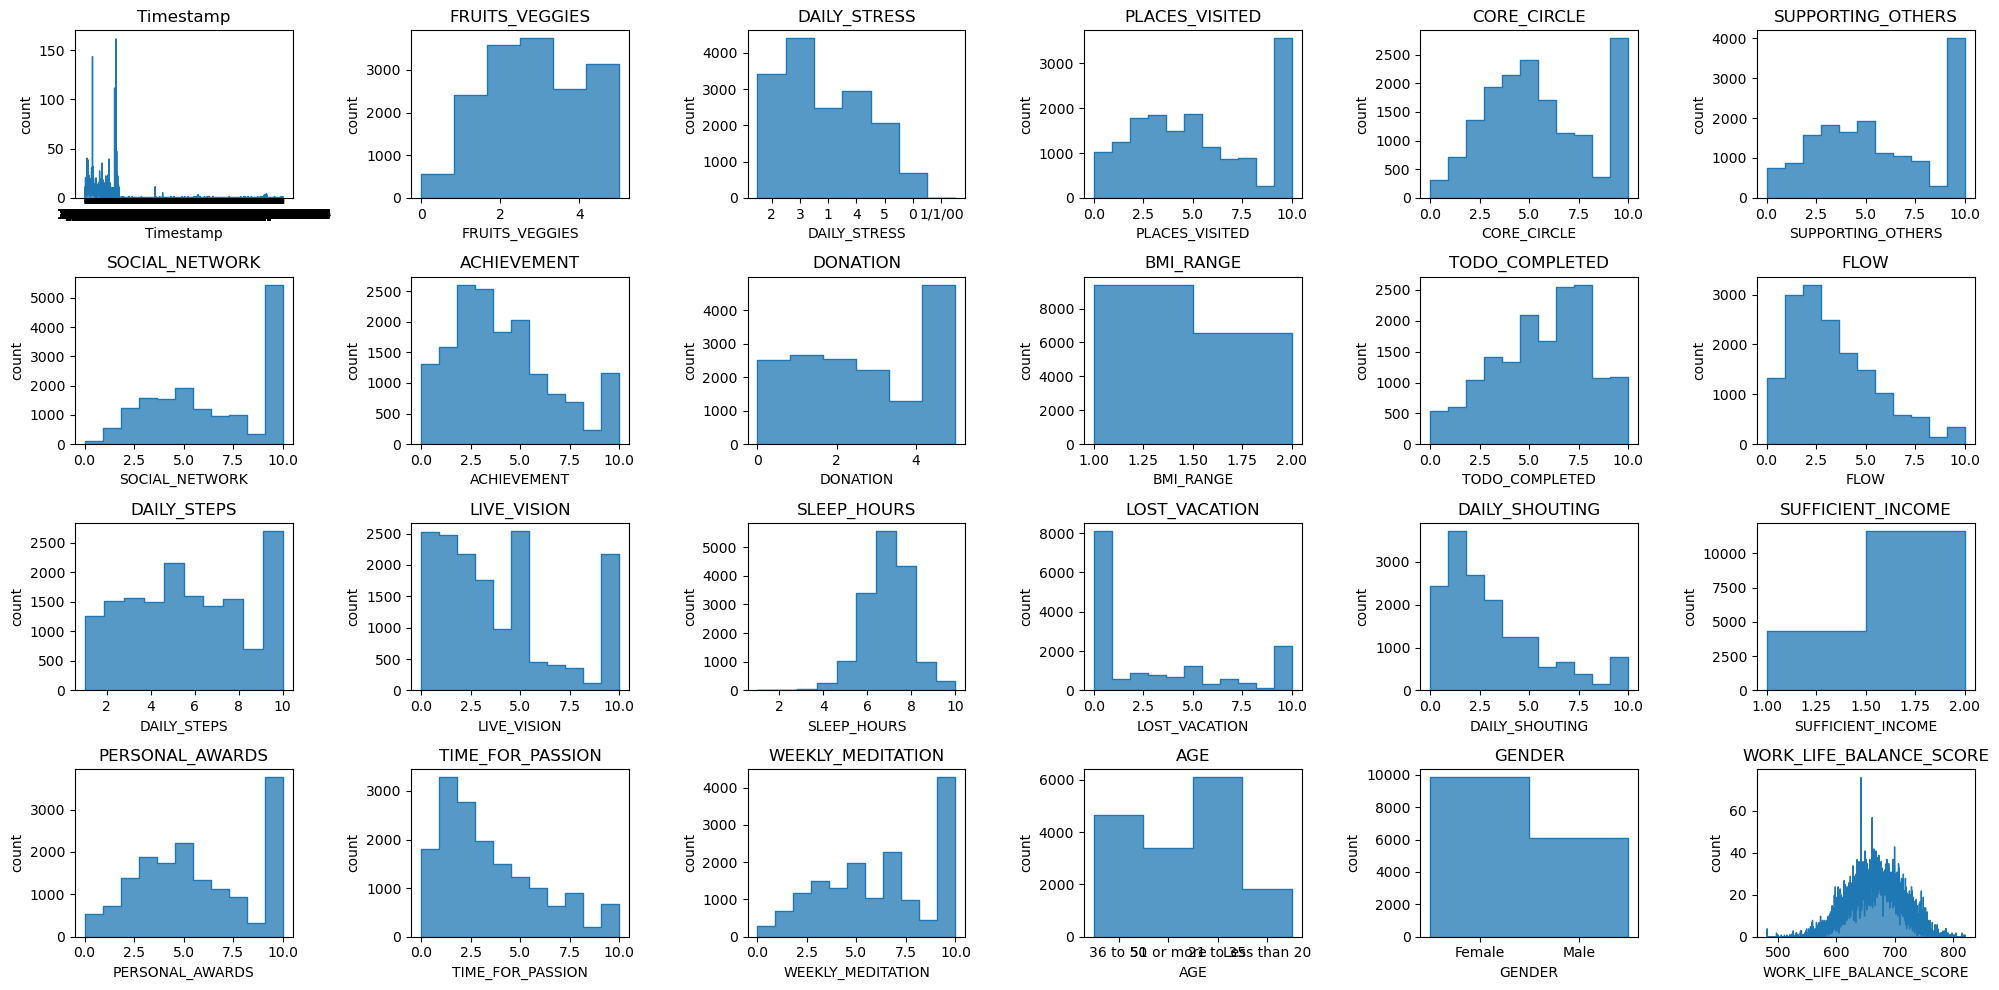

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모든 열에 대한 히스토그램 subplot 생성
fig, axes = plt.subplots(4, 6, figsize=(20, 10))
# 각 열에 대해 히스토그램 그리기
for i, column in enumerate(df.columns):
    
    row0 = i // 6
    col0 = i % 6
    sns.histplot(df[column], bins=len(set(df[column])), element='step', kde=False, ax=axes[row0,col0]) ## 좌우를 꽉 채우는 그래프
    axes[row0,col0].set_title(f'{column}')
    axes[row0,col0].set_xlabel(column)
    axes[row0,col0].set_ylabel("count")

# 전체 그래프의 레이아웃 조절
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [129]:
df["AGE"].value_counts()

AGE
21 to 35        6107
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: count, dtype: int64

대부분의 데이터가, 최대 x값을 제외하고는 정규분포 형태를 따르지만, 최대 x값에서 높은 peak를 보인다. 이유는 다음과 같다고 분석할 수 있다.
<br/>
- 대부분의 column 항목들의 숫자에는 최솟값이 존재하고, 그 값이 0이 된다(정의에 따라서 음수는 존재할 수 없기 때문에). 따라서, 정규분포와 비슷한 분포를 보이더라도, 오른쪽이 길어야 한다. 
- 하지만 최댓값에 제한이 있기 때문에, 최댓값을 초과하는 경우가 전부 최대값에 몰리게 된다. 따라서, 최대값에서 최대 counts가 나온다. 설문지 자체에서 10이라는 수치 이상이면 전부 10을 선택하도록 설정했을 가능성이 크다.
<br/>
항목이 2개인 경우를 제외하고, 최대 x값에서 높은 peak를 가진 경우 해당 x값을 제외하고 보면, 정규분포와 비슷한 분포를 보인다. 예외는 다음과 같다.
<br/>
- LIVE_VISION : 항목의 특수성이 많이 작용했을 것이라고 분석할 수 있다. 성인이 80%가 넘는 데이터셋이고, 인생 비전이 명확해지기 위해 몇 해가 남았는지에 대한 데이터이기 때문에, 짧은 기간의 counts도 높으리라 생각해볼 수 있다. 특이한 점은 5년에 해당하는 peak인데, 사회 초년생이거나 신입 또는 이직으로 업무가 바뀌었을 때, 목표를 세우는 기간이라고 생각해볼 수 있다. 
- LOST_VACATION : 미국이 노동법이 엄격한 나라여서 그런지, 0의 peak가 굉장히 높은 걸 알 수 있다.
-----
위의 코드로 그린 그래프에서 두 가지 문제점과 한 가지 수정 사항이 발견돼서 코드를 수정해, 그래프를 업데이트 했습니다.
1. Timestamp : 각각의 항목이 string으로 들어가서 x축의 범례가 보이지 않음. 또한, 완료 날짜는 다른 데이터와 달리 의미가 없을 것이라고 판단되어 삭제했습니다.
2. DAILYSTRESS : 1/1/00이라는 값 때문에 column 전체가 int가 아니라 string이 돼버림. 해당 row를 삭제하고, 데이터 타입을 변경해서 해결했습니다.
3. (수정사항) AGE, : 그래프를 그리다가 해당 column이 나올 경우 파이차트로 바꿔서 그리게해서 조금 더 시각적으로 지분이 잘 보이게 했습니다.

In [18]:
try:
    ##  Timestamp 삭제
    df.drop("Timestamp",axis=1,inplace=True)
except:
    pass
try:
    ### DAILYSTRESS 수정

    indexes_to_drop = df[df['DAILY_STRESS']=='1/1/00'].index # 해당 값 index 찾기

    df.drop(indexes_to_drop,inplace=True) # 해당 값 row 삭제
    df['DAILY_STRESS'] = df['DAILY_STRESS'].astype('int64') # DAILY_STRESS Column type을 int로 변경
except:
    pass
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15971 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15971 non-null  int64  
 1   DAILY_STRESS             15971 non-null  int64  
 2   PLACES_VISITED           15971 non-null  int64  
 3   CORE_CIRCLE              15971 non-null  int64  
 4   SUPPORTING_OTHERS        15971 non-null  int64  
 5   SOCIAL_NETWORK           15971 non-null  int64  
 6   ACHIEVEMENT              15971 non-null  int64  
 7   DONATION                 15971 non-null  int64  
 8   BMI_RANGE                15971 non-null  int64  
 9   TODO_COMPLETED           15971 non-null  int64  
 10  FLOW                     15971 non-null  int64  
 11  DAILY_STEPS              15971 non-null  int64  
 12  LIVE_VISION              15971 non-null  int64  
 13  SLEEP_HOURS              15971 non-null  int64  
 14  LOST_VACATION            15

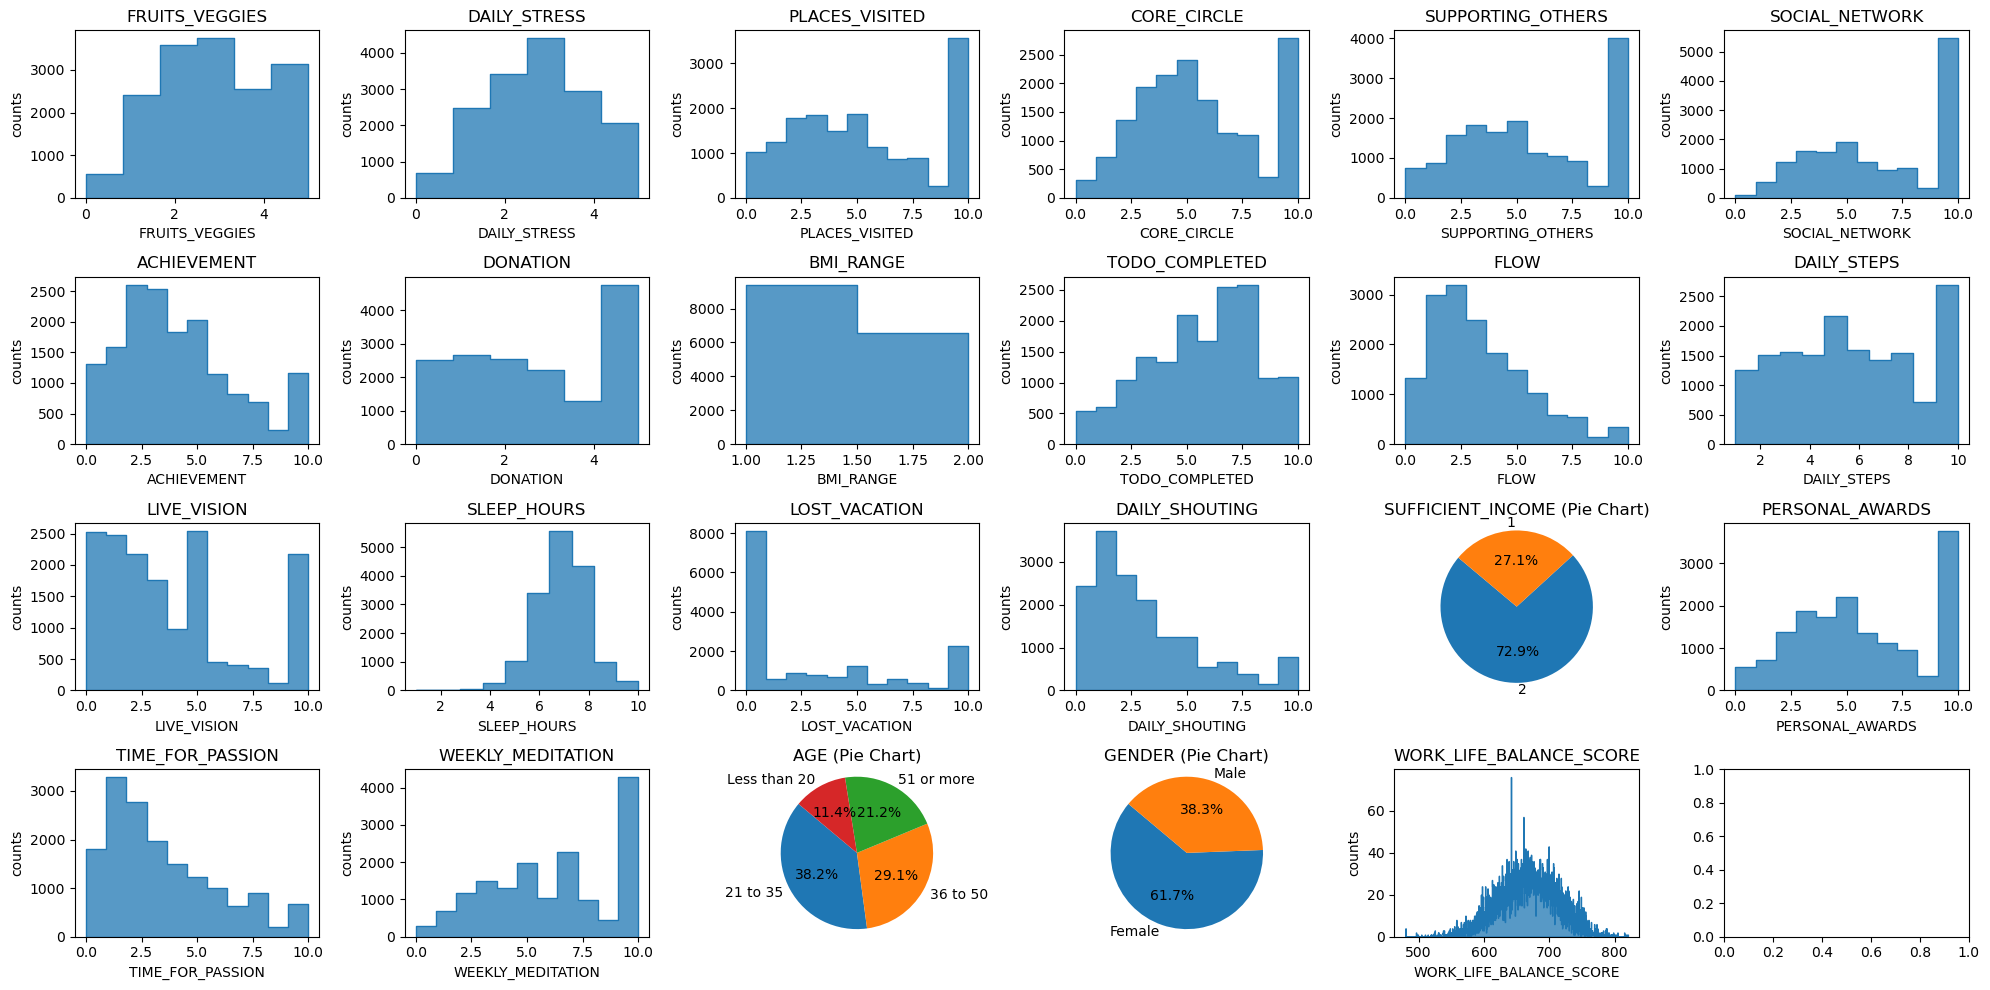

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모든 열에 대한 히스토그램 subplot 생성
fig, axes = plt.subplots(4, 6, figsize=(20, 10))
# 각 열에 대해 히스토그램 그리기

for i, column in enumerate(df.columns):
    
    row0 = i // 6
    col0 = i % 6
    if column == "AGE" or column== "GENDER" or column == "SUFFICIENT_INCOME": ## 조건에 해당하는 column일 경우 pie차트를 그림.
        ColCounts = df[column].value_counts()
        axes[row0, col0].pie(ColCounts, labels=ColCounts.index, autopct='%1.1f%%', startangle=140)
        axes[row0, col0].axis('equal')
        axes[row0, col0].set_title(f'{column} (Pie Chart)')
    
    else:
        sns.histplot(df[column], bins=len(set(df[column])), element='step', kde=False, ax=axes[row0,col0]) ## 좌우를 꽉 채우는 그래프
        axes[row0,col0].set_title(f'{column}')
        axes[row0,col0].set_ylabel("counts")

# 전체 그래프의 레이아웃 조절
plt.tight_layout()

# 그래프 보여주기
plt.show()

# 2. Column간의 상관관계 분석

-----

## 2.1 상관계수 행렬
상관계수 행렬을 구하기 전에, AGE와 GENDER Column에 숫자를 배정해야 합니다.

In [19]:
# data type을 먼저 str로 수정
df.info()
df['AGE']= df['AGE'].astype(str)
df['GENDER']=df['GENDER'].astype(str)
df.info()

# unique를 사용해 어떤 값들이 있는지 확인하고 변수에 저장.
AGEValue = df["AGE"].unique()
GENDERValue = df["GENDER"].unique()

print(AGEValue)
print(GENDERValue)

<class 'pandas.core.frame.DataFrame'>
Index: 15971 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15971 non-null  int64  
 1   DAILY_STRESS             15971 non-null  int64  
 2   PLACES_VISITED           15971 non-null  int64  
 3   CORE_CIRCLE              15971 non-null  int64  
 4   SUPPORTING_OTHERS        15971 non-null  int64  
 5   SOCIAL_NETWORK           15971 non-null  int64  
 6   ACHIEVEMENT              15971 non-null  int64  
 7   DONATION                 15971 non-null  int64  
 8   BMI_RANGE                15971 non-null  int64  
 9   TODO_COMPLETED           15971 non-null  int64  
 10  FLOW                     15971 non-null  int64  
 11  DAILY_STEPS              15971 non-null  int64  
 12  LIVE_VISION              15971 non-null  int64  
 13  SLEEP_HOURS              15971 non-null  int64  
 14  LOST_VACATION            15

In [22]:
# 각 column을 mapping할 map을 구성
GENDERMapping = {} 
AGEMapping = {}
for i,v in enumerate(GENDERValue):
    GENDERMapping[v] = i
for i1,v1 in enumerate(AGEValue):    
    AGEMapping[v1]= (i1+1) % 4 # 가장 적은 수인 Less than 20을 0으로 보내기 위해.
print(GENDERMapping)
print(AGEMapping)

# mapping
df['GENDER'] = df['GENDER'].map(GENDERMapping)
df['AGE'] = df['AGE'].map(AGEMapping)
print(df[["AGE","GENDER"]].head())
corr = df.corr(method = 'pearson')
print(corr)

{'Female': 0, 'Male': 1}
{'36 to 50': 1, '51 or more': 2, '21 to 35': 3, 'Less than 20': 0}
   AGE  GENDER
0    1       0
1    1       0
2    1       0
3    2       0
4    2       0
                         FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED  \
FRUITS_VEGGIES                 1.000000     -0.094535        0.254906   
DAILY_STRESS                  -0.094535      1.000000       -0.134857   
PLACES_VISITED                 0.254906     -0.134857        1.000000   
CORE_CIRCLE                    0.157785     -0.120238        0.255803   
SUPPORTING_OTHERS              0.204469     -0.029852        0.237981   
SOCIAL_NETWORK                 0.106941      0.020930        0.149358   
ACHIEVEMENT                    0.162901     -0.110943        0.257960   
DONATION                       0.199462     -0.037721        0.204597   
BMI_RANGE                     -0.092976      0.083110       -0.108054   
TODO_COMPLETED                 0.227005     -0.163727        0.227671   
FLOW           

## 2.2 Seaborn Heatmap 그리기

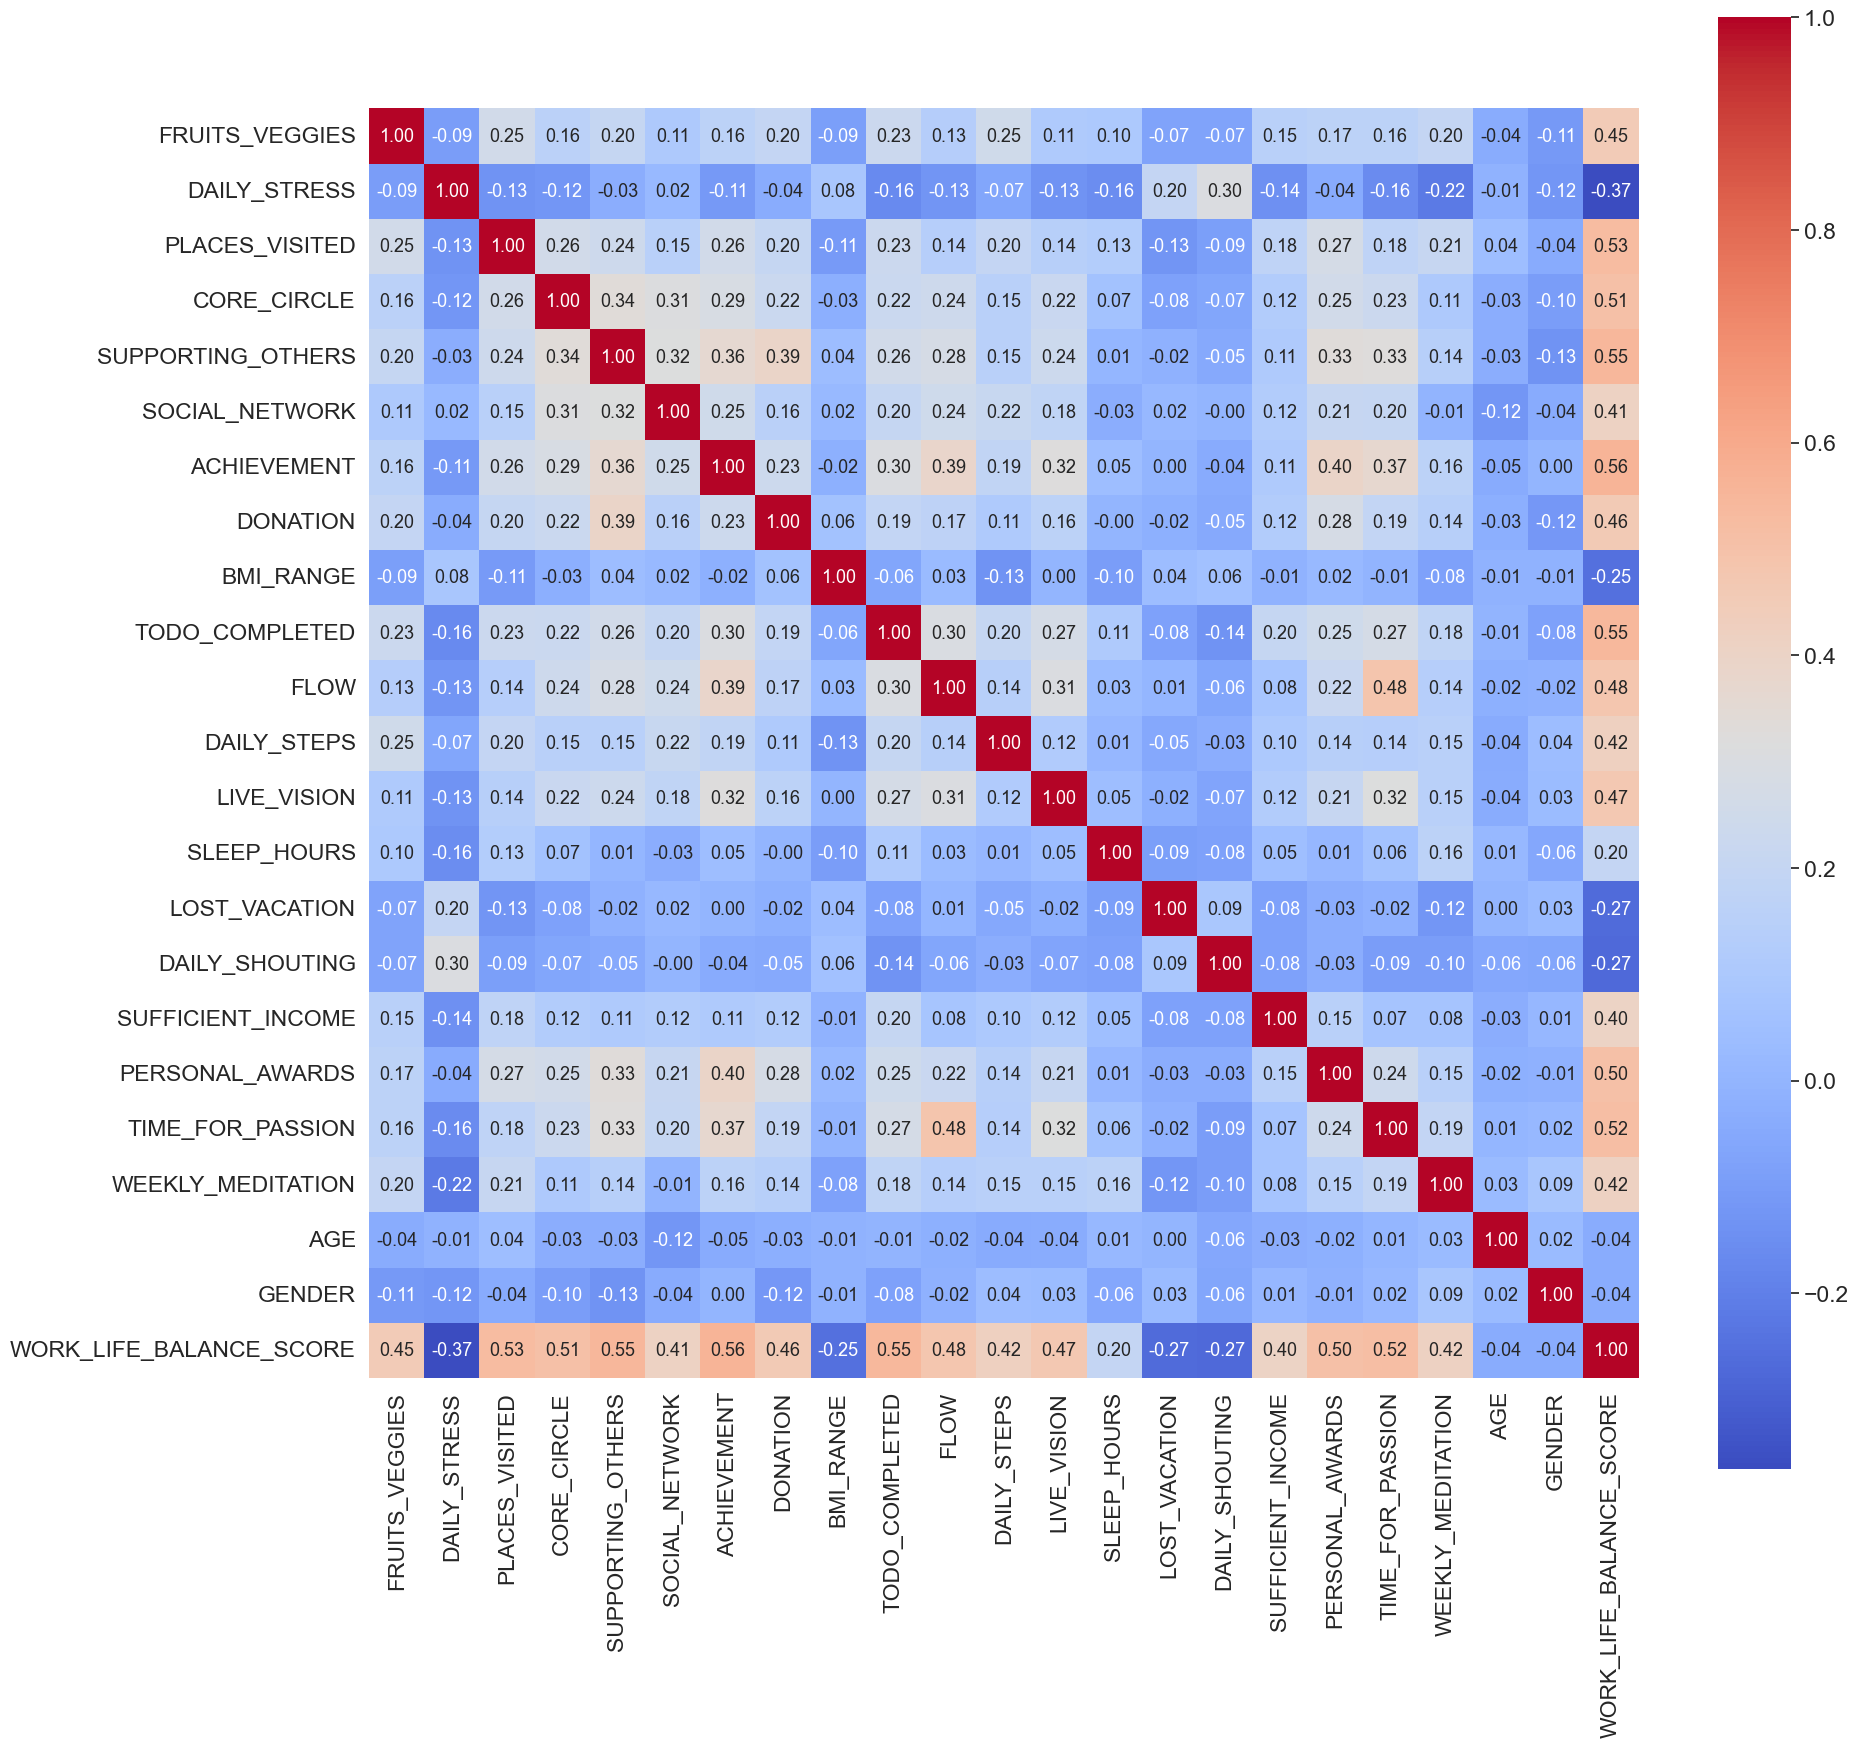

In [158]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
plt.figure(figsize=(20,18))
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,annot=True,cmap='coolwarm',fmt='.2f', 
            square=True,annot_kws={'size': 13},cbar=True,
            yticklabels=df.columns,xticklabels=df.columns)

plt.tight_layout()
plt.show()



### 2.3 **Anaylsis**
#### A. WORK_LIFE_BALANCE_SCORE와 나머지 변수들 간의 관계. WORK_LIFE_BALANCE_SCORE는 삶의 만족도와 행복도와 연관이 있다고 볼 수 있다. 높을수록 좋고, 낮을수록 좋지 않다.
- 긍정적인 column들(수가 높을수록 좋은 데이터들)과는 양의 상관관계를 보여준다. (ex, FRUITS_VEGGIES,FLOW,TODO_COMPLETED,... etc). 여기서 0.4~ 0.6 사이의 큰 상관 관계가 있는 변수들이 대부분이지만, 0.2의 상관관계를 가지는 SLEEP_HOURS도 있다. SCATTER PLOT으로 확인해야겠지만, (첫 번째 가설, **H1**)"SLEEPHOUR가 어느정도 늘어나면 행복도가 늘어나서 SCORE가 커지겠으나, 일정 수준 이상이면 다시 떨어질것"이라고 생각해볼 수 있다.

- 부정적인 column들(수가 높을수록 좋지 않은 데이터들)과는 음의 상관관계를 부여준다. (ex, DAILY_STRESS,BMI_RANGE,LOST_VACATION,DAILY_SHOUTING)

- 또 다른 눈여겨 봐야할 점들은, AGE나 GENDER와는 거의 관계가 없다는 점이다. 즉, AGE & GENDER vs WORK_LIFE_BALANCE는 독립적이다. 하지만, 약간의 음의 상관관계는 존재한다. 나이가 들수록, 여자보다는 남자가 조금 더 점수가 낮다.

#### B. 선명한 Correlation이 존재함.
- 대부분은 당연한 관계이다. TIME_FOR_PASSION이 높으면 FLOW가 높고, ACHIVEMENT가 높으면 PERSONAL_AWARD도 높다. 즉, 긍정적인 변수는 긍정적인 변수와 연관이 있고, 부정적인 변수는 부정적인 변수와 연관이 있다. 하지만, 여기서 눈여겨 봐야할 correlation도 있는데, LIVE_VISION이 높을수록 TIME_FOR_PASSION이 높다는 것이다. 상식은 생각되는 Clear life vision이 가까울수록 passion이 높을 것 같지만, 그렇지 않을 수도 있다는 것을 나타낸다. 그래서, 검증해야할 가설은 (두 번째 가설, **H2**)"Clear live vision이 높을수록 passion이 높다"

#### C. 흐릿한 correlation이나 상식과 반대되는 Correlation 또한 존재한다.
- LOST_VACATION(LVA)과 ACHIEVEMENT(ACH) : ACH가 높아지면 LVA가 높아져야 할 것 같지만, 아무 연관성이 없다. 또한, 흔히 얘기하는 쉴땐 잘 쉬고 일한 땐 일에 집중하는 사람들이 더 일을 잘한다는 가설또한 correlation 이 0이기 때문에 성립하지 않는다. 단지 두 변수는 독립적일 뿐이다.

- DAILY_SHOUTING과 DAILY_STRESS는 상식적으로 큰 양의 상관관계를 가져야 할 것이라 생각해 볼 수 있다. 하지만, 데이터에서는 적당한 양의 상관관계만 존재한다. 한가지 생각을 해보자면, 소리를 지르는 사람들은 스트레스를 많이 받지만 소리를 지르면서 어느정도 해결하는게 아닐까 생각해볼 수 있다. 혹은, 너무 스트레스를 받으면 소리를 지를 수 있는 힘마저 사라지는게 아닌가 생각해볼 수 있다. 마찬가지로 스트레스가 올라갈때 DAILY_SHOUTING의 평균이 올라가는지 확인 한 후, 어느 지점에서 다시 내려가는지 여부를 체크해보면 (세 번째 가설, **H3**)"스트레스가 심해질 때 더 많은 고함을 지르지만, 어느 수준 이상으로 가면 고함을 덜 지르게 된다"는 가설에 대한 검증이 완료될 것이다.

- 다음은 SLEEP_HOURS와 DAILY_STEPS와의 관계다. 걷는 수가 많아지면 더 피곤해져 자는 시간이 늘어날 것 같지만 그렇지 않은 결과가 나온다. (네 번째 가설, **H4.1**)"걷는 시간이 많아지면 더 피곤해져 자는 시간이 늘어날 것이다"라는 가설을 귀무 가설로 세우고, (네 번째 가설의 대립가설, **H4.2**)"둘은 독립적인 관계일 것이다"를 대립가설로 설정하겠다. t-test와 p-value 검증을 통해 
가설을 검증해볼 것이다.
- AGE와 GENDER는 다른 변수들과 상관관계가 그리 크지 않다. 
    </br>
    - 하지만, 몇몇 포인트가 존재하는데, AGE가 올라갈 때, SOCIAL_NETWORK가 줄어든다는 점이다. 선명한 관계는 아니지만, 어느정도 음의 상관관계가 존재한다. 이 관계는 지극히 상식적이라고 볼 수 있다.
    - GENDER에서 여자보다 남자가 야채, 과일을 더 적게 먹고, 더 스트레스 받으며, 타인을 덜 돕는다는 약한 상관관계도 확인해 볼 수 있다.

- 변수가 23개이므로, $\frac{23\times22}{2}=253$ 개의 pair가 존재하며 그 중에 눈에 띄는 몇 가지의 관계만 살펴 봤습니다. 분석해볼만 할 다른 관계는 추후에 분석하고자 합니다.

#### D. 가설 검증 
증명 방법은 두 가지를 사용할 것이다.
방법 1 : 해당 변수의 크기 증가에 대한 다른 변수의 평균값 변화.
방법 2 : t-test와 p-value 검증
- **H1** : 1에서 언급했던 "SLEEPHOUR가 어느정도 늘어나면 행복도가 늘어나서 SCORE가 커지겠으나, 일정 수준 이상이면 다시 떨어질거라고 생각해볼 수 있다."라는 부분을 내 가설(**H1**)로 삼고, 이것을 아래에서 증명하려고 한다. **(with 방법 1)**
- **H2** : 2에서 언급했던 "Clear live vision이 높을수록 passion이 높다는 것이다."라는 가설(**H2**)도 검증해보려고 한다. **(with 방법 1)**
- **H3** : "스트레스가 심해질 때 더 많은 고함을 지르지만, 어느 수준 이상으로 가면 고함을 덜 지르게 된다". **(with 방법 1)**
- **H4.1** & **H4.2** : (네 번째 가설, **H4.1**)"걷는 시간이 많아지면 더 피곤해져 자는 시간이 늘어날 것이다"라는 가설을 귀무 가설로 세우고, (네 번째 가설의 대립가설, **H4.2**)"둘은 독립적인 관계일 것이다"를 대립가설로 세운다. **(with 방법 2)**


#####  D.1 **H1**에 대한 증명
 **H1** : "SLEEPHOUR가 어느정도 늘어나면 행복도가 늘어나서 SCORE가 커지겠으나, 일정 수준 이상이면 다시 떨어질거라고 생각해볼 수 있다."

아래의 결과에서, 1시간 부터 수면 시간이 늘어날수록 WORK_LIFE_BALANCE_SCORE(WLBS)의 평균이 늘어나지만, 8시간에서 가장 높고, 그 이후부터는 줄어든다. 따라서 **H1**에 대한 증명이 완료되었다.


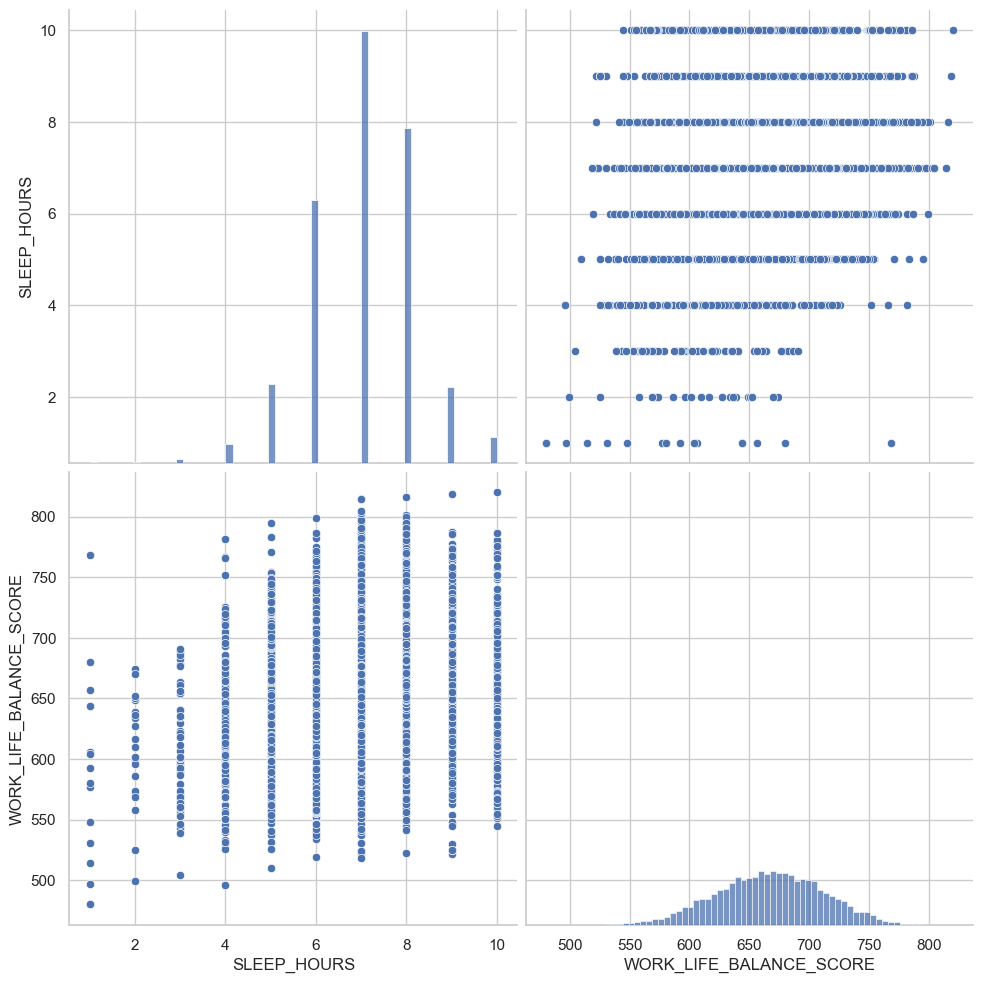

In [163]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[['SLEEP_HOURS', "WORK_LIFE_BALANCE_SCORE"]], height=8)
plt.show()

In [4]:
### SLEEP_HOURS와 WORK_LIFE_BALANCE_SCORE 사이의 가설 검증
### SLEEP_HOURS = 4~9일 때 WORK_LIFE_BALANCE_SCORE(WLBS)의 평균과 SLEEP_HOURS = 10일 때 WLBS의 평균을 구해서 비교.

def print_mean(number):
    mean = df[df['SLEEP_HOURS']==number]['WORK_LIFE_BALANCE_SCORE'].mean()
    print(f"mean with {number} : {round(mean,5)}")
for i in range(1,11):
    print_mean(i)


mean with 1 : 575.70556
mean with 2 : 606.48571
mean with 3 : 607.0551
mean with 4 : 633.07103
mean with 5 : 645.82224
mean with 6 : 657.31858
mean with 7 : 671.01026
mean with 8 : 676.99537
mean with 9 : 669.3771
mean with 10 : 658.33604


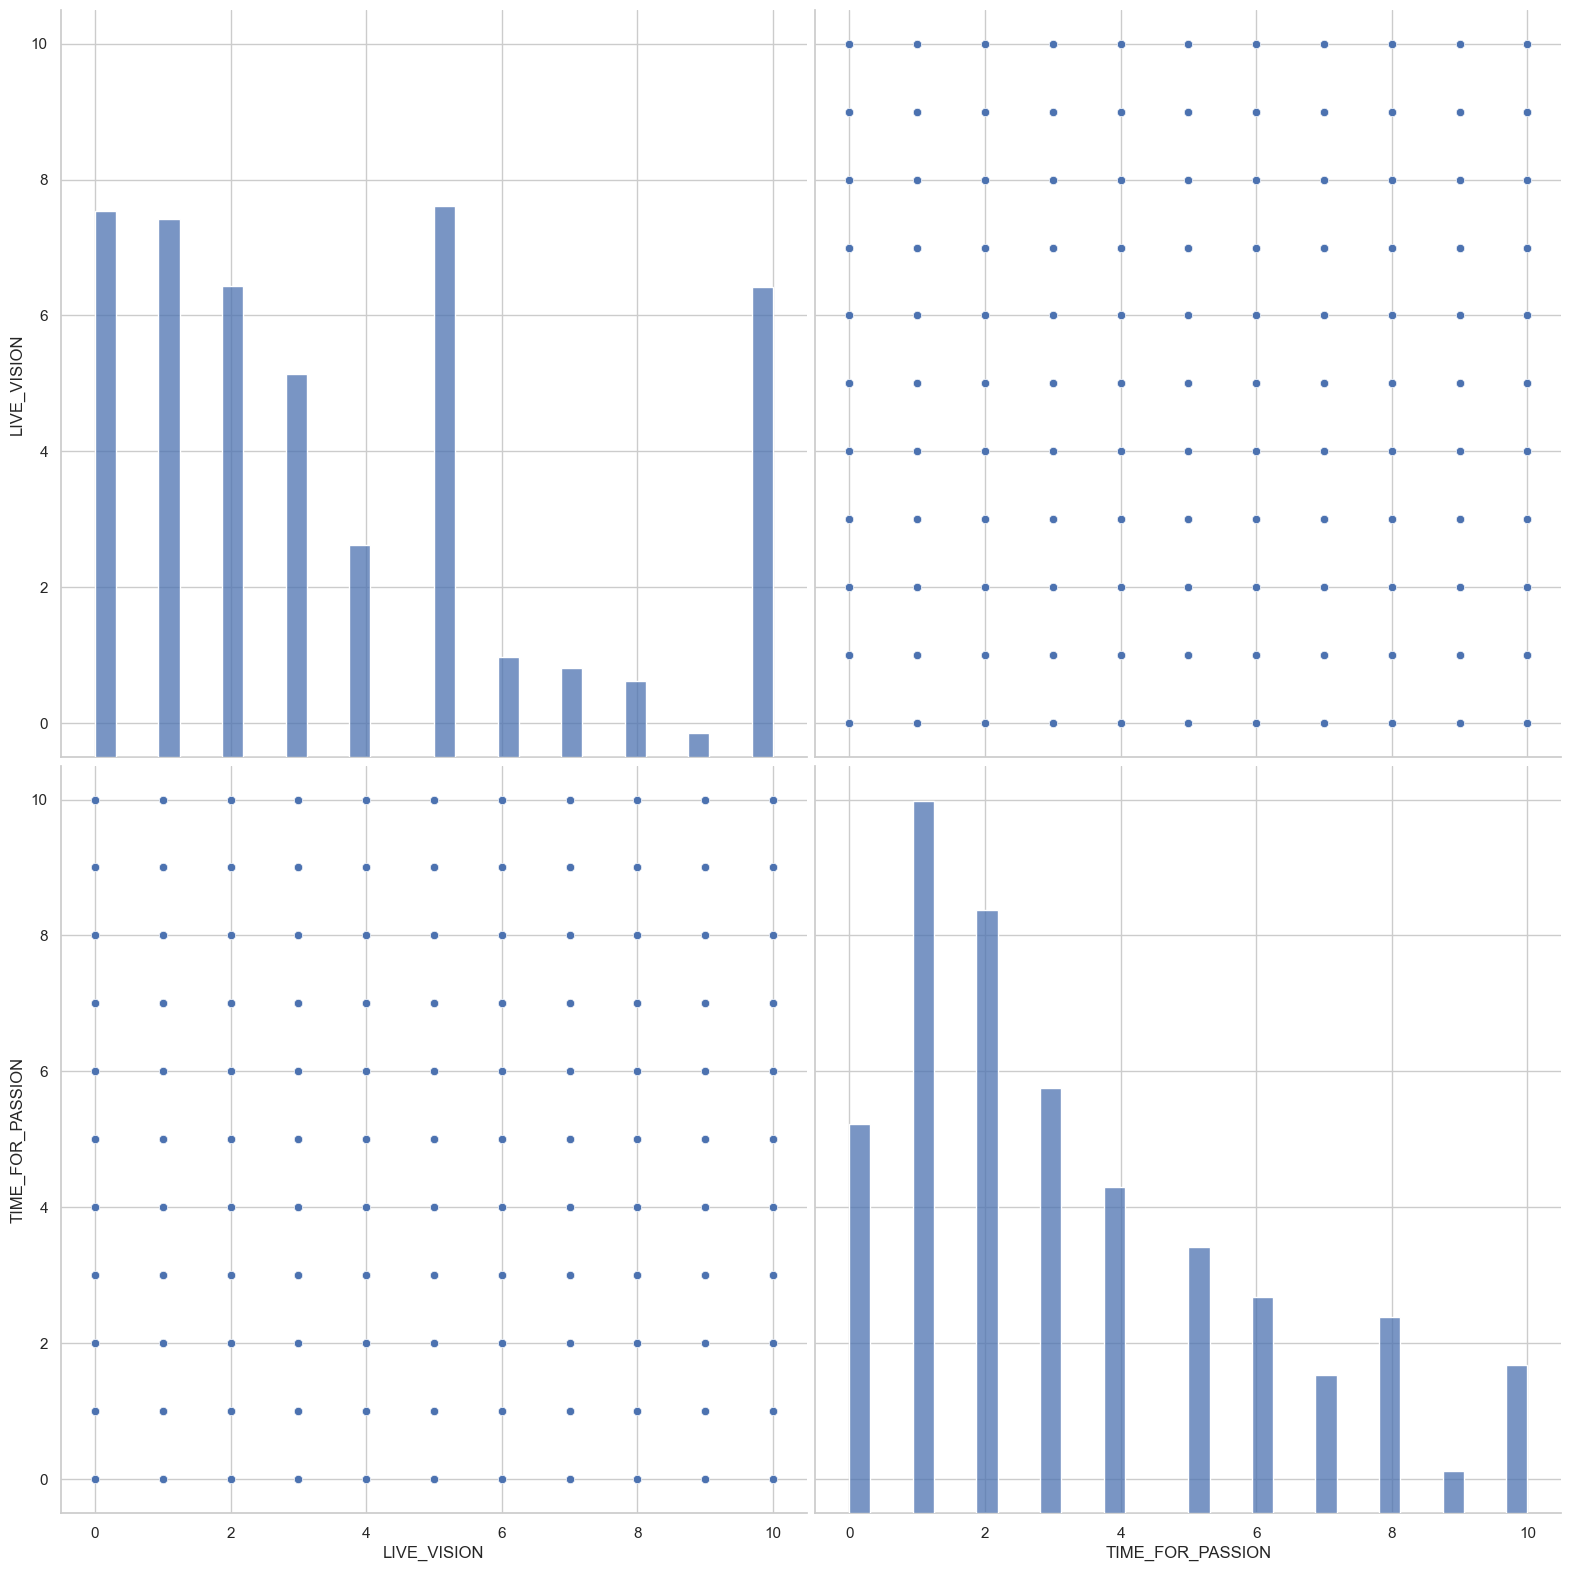

In [170]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[['LIVE_VISION', "TIME_FOR_PASSION"]], height=8)
plt.show()

##### D.2  **H2** 에 대한 증명
H2 : LIVE_VISION이 높을수록 TIME_FOR_PASSION도 높을 것이다.  
- 아래의 결과에서, 가설 H2는 9년 까지는 타당하고, LIVE_VISION이 10년이 넘는 경우에는 떨어지는 것을 볼 수 있다. 이는 너무 긴 LIVE VISION을 가지면, 오히려 PASSION이 줄어든다(가설 반증). 하지만 9년까지는 유지가 되는 부분은 신기한 부분이다. 이유를 한번 생각해 보자면, 10년은 두자리수가 되어 심리적으로 너무 길다고 생각되기 때문일지도 모른다는 새로운 가설을 생각해 볼 수 있다. 이 가설은 추가적인 실험으로 데이터를 모아서 검증해볼 수도 있을 것이다.

In [172]:
def print_meanLT(number):
    mean = df[df['LIVE_VISION']==number]['TIME_FOR_PASSION'].mean()
    print(f"mean with {number} : {round(mean,5)}")
for i in range(0,11):
    print_meanLT(i)

mean with 0 : 1.88562
mean with 1 : 2.60805
mean with 2 : 3.00736
mean with 3 : 3.29711
mean with 4 : 3.56748
mean with 5 : 3.96187
mean with 6 : 4.26898
mean with 7 : 4.3632
mean with 8 : 4.66667
mean with 9 : 4.9823
mean with 10 : 4.61024


##### D.3  **H3**에 대한 증명 
**H3** : "스트레스가 심해질 때 더 많은 고함을 지르지만, 어느 수준 이상으로 가면 고함을 덜 지르게 된다". 

증명에 앞서, 위의 함수를 한번 더 조정해, 해당 열들의 header pair를 넣으면 평균값을 print하는 함수를 만들어보려고 한다.

함수를 만든 뒤 결과를 봤지만, 약한 상관관계이긴 하지만 스트레스가 심해졌을 때, 고함도 늘어나는 걸 볼 수 있다. 원래 가설 **H3**는 반증되었고, 스트레스가 심해지면 더 많은 고함을 지르게 된다.


In [13]:

def print_mean_final(col1,col2):
    dataNumCol1 = np.sort(df[col1].unique())
    for i in dataNumCol1:
        mean = df[df[col1]==i][col2].mean()
        print(f"mean with {i} : {round(mean,5)}")

print_mean_final("DAILY_STRESS","DAILY_SHOUTING")
    

<class 'numpy.ndarray'>
mean with 0 : 1.46598
mean with 1 : 1.84383
mean with 2 : 2.47314
mean with 3 : 3.04161
mean with 4 : 3.51892
mean with 5 : 4.40156


##### D.4  **H4**에 대한 증명 
**H4.1** & **H4.2** : (네 번째 가설, **H4.1**)"걷는 시간이 많아지면 더 피곤해져 자는 시간이 늘어날 것이다"라는 가설을 귀무 가설로 세우고, (네 번째 가설의 대립가설, **H4.2**)"둘은 독립적인 관계일 것이다"를 대립가설로 세운다. **(with 방법 2)**


##### **p-value**
-----

In [37]:
from scipy.stats import ttest_ind
import scipy.stats as stats
correlation, p_value = stats.pearsonr(df["SLEEP_HOURS"], df["DAILY_STEPS"])


print("상관 계수:", correlation)
print("P-값:", p_value)


상관 계수: 0.009218318553775383
P-값: 0.24405474496650365


p_value가 0.05를 넘었기 때문에, 귀무 가설을 반증하고, 대립가설을 채택해야 한다.

# 4. K-means Method

## 4.1 cluster 개수 선택
현재 데이터셋에 맞는 적절한 cluster 개수를 얻기 위 cluster 개수를 1부터 10까지 Kmeans algorithm을 돌리면서 inertia가 살짝 꺾이는, elbow point를 갖는 n_cluster를 선택한다.



c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

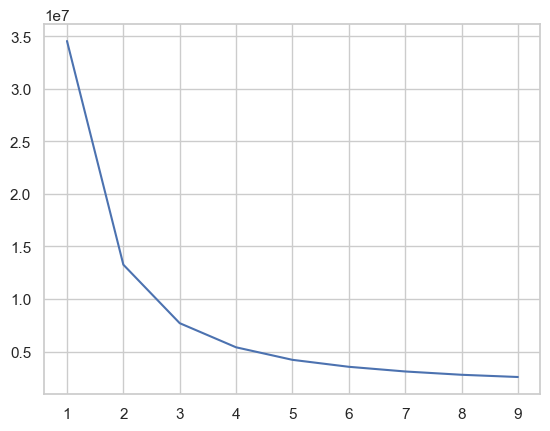

In [175]:
from sklearn.cluster import KMeans

# 적절한 cluster 개수 선택
num_clusters = [x for x in range(1,10)]
inertia = []
for i in num_clusters:
    model = KMeans(n_clusters = i, init="k-means++")
    model.fit(df)
    inertia.append(model.inertia_)
    
plt.plot(num_clusters, inertia)
plt.show()

그래프와 Elbow Method를 기반으로 n_cluster = 3으로 결정했습니다.

이제 새 column에 데이터를 cluster로 분류된 label을 넣어보고 히트맵으로 시각화를 해보겠습니다.
</br>

## 4.2 Heatmap Visualization

c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


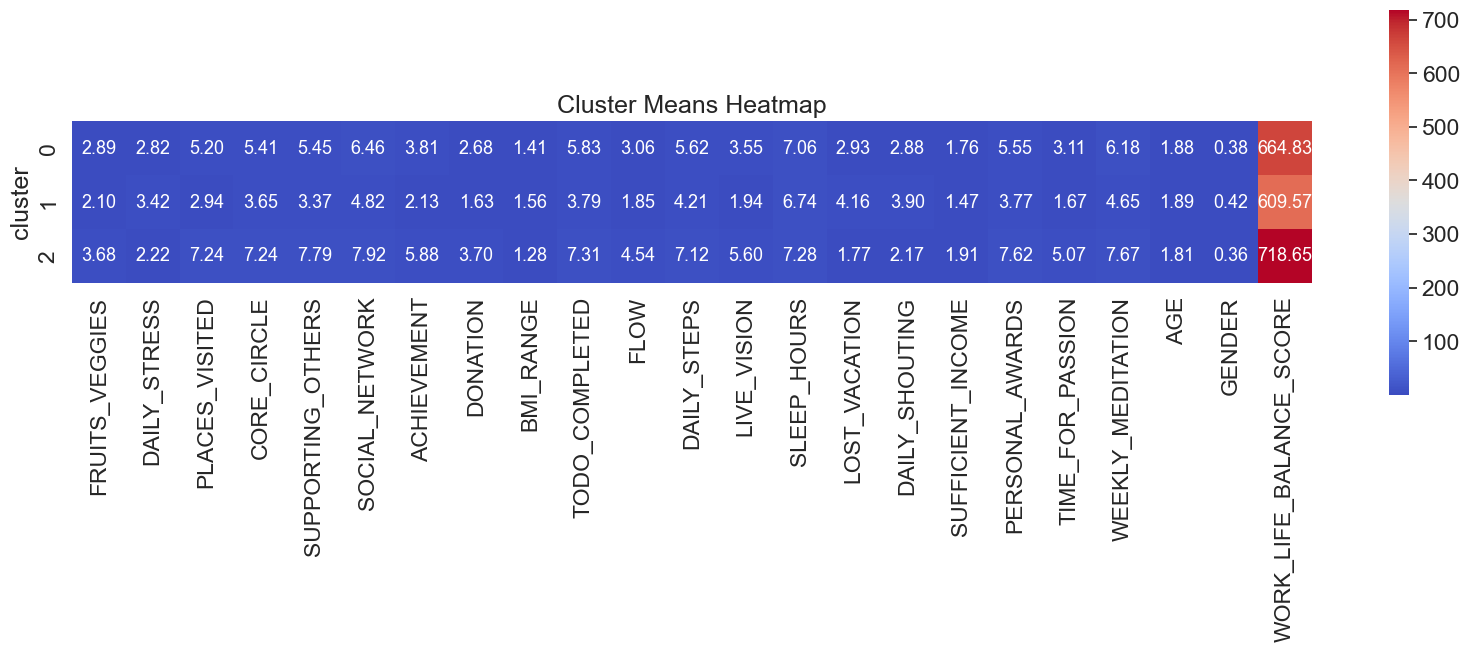

In [194]:
### cluster label에 대하여 각 항목의 값에 대한 평균을 구한다.
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df)

cluster_menas = df.groupby('cluster').mean() ## cluster별로 묶어서 평균을 구하고자 함.
plt.figure(figsize=(20,5))
sns.set(font_scale=1.5)
sns.heatmap(cluster_menas,annot=True,cmap='coolwarm',fmt='.2f', 
            square=True,annot_kws={'size': 13},cbar=True)
plt.title('Cluster Means Heatmap')
plt.show()

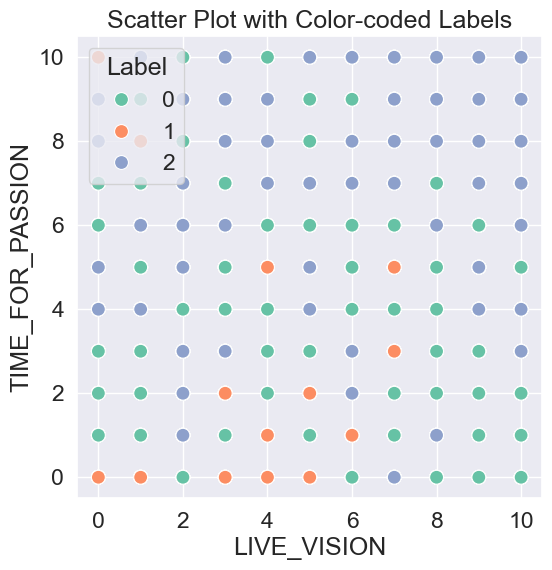

In [195]:
### plot graph

def plot_graph(xData,yData):
    plt.figure(figsize=(6, 6))
    
    sns.scatterplot(data=df, x=xData, y=yData, hue='cluster', palette='Set2', s=100)

    plt.title('Scatter Plot with Color-coded Labels')
    plt.xlabel(xData)
    plt.ylabel(yData)

    # 범례 추가
    plt.legend(title='Label')

    # 그래프 보여주기
    plt.show()
xData = 'LIVE_VISION'
yData = 'TIME_FOR_PASSION'

plot_graph(xData,yData)

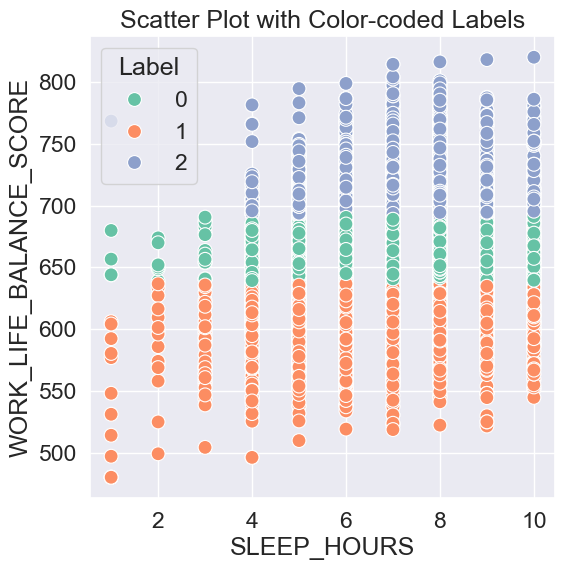

In [196]:
xData = 'SLEEP_HOURS'
yData = 'WORK_LIFE_BALANCE_SCORE'

plot_graph(xData,yData)

Label 0 은 중간 점수의 사람들, Label 1은 아래 점수의 사람들, Label 2는 높은 점수의 사람들로 구성되어 있고, SLEEP_HOURS가 4 이상인 사람들로 구성되어있다. 몇 몇 변수에 대해서만 큰 관계를 나타낸다. 이걸 보고 생각해본것이, 다른 변수들은 최대 10의 크기를 가지는데, work_LIFE_BALANCE는 0에서 1000사이의 값을 가지기 때문에, WORK_LIFE_BALANCE에 대해서는 분류가 잘된 것이라고 볼 수 있다. 따라서, 정규화(Normalization)를 해야한다. 

In [26]:
def normalize_column(column):
    return (column - column.min()) / (column.max() - column.min())

#df.info()
# 각 column에 대해 정규화 수행
normalized_df = df.apply(normalize_column)

# 정규화된 데이터프레임 출력
#print(normalized_df.info())
print(normalized_df.head())

   FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0             0.6           0.4             0.2          0.5   
1             0.4           0.6             0.4          0.3   
2             0.4           0.6             0.3          0.4   
3             0.6           0.6             1.0          0.3   
4             1.0           0.2             0.3          0.3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  \
0                0.0             0.5          0.2       0.0        0.0   
1                0.8             1.0          0.5       0.4        1.0   
2                0.4             1.0          0.3       0.4        1.0   
3                1.0             0.7          0.2       1.0        1.0   
4                1.0             0.4          0.2       0.8        1.0   

   TODO_COMPLETED  ...  SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  \
0             0.6  ...     0.666667            0.5             0.5   
1             0.5  ...     0.7

c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

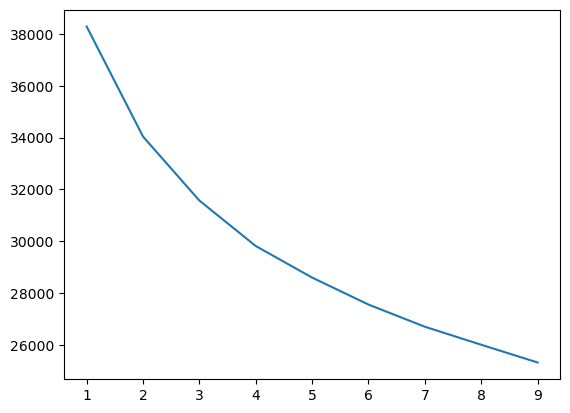

In [28]:
from sklearn.cluster import KMeans

# 적절한 cluster 개수 선택
num_clusters = [x for x in range(1,10)]
inertia = []
for i in num_clusters:
    model = KMeans(n_clusters = i, init="k-means++")
    model.fit(normalized_df)
    inertia.append(model.inertia_)
    
plt.plot(num_clusters, inertia)
plt.show()

Elbow Method를 사용해보면, n=4가 적절한 cluster의 개수인 것을 알 수 있다.

c:\Users\bluecom017\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


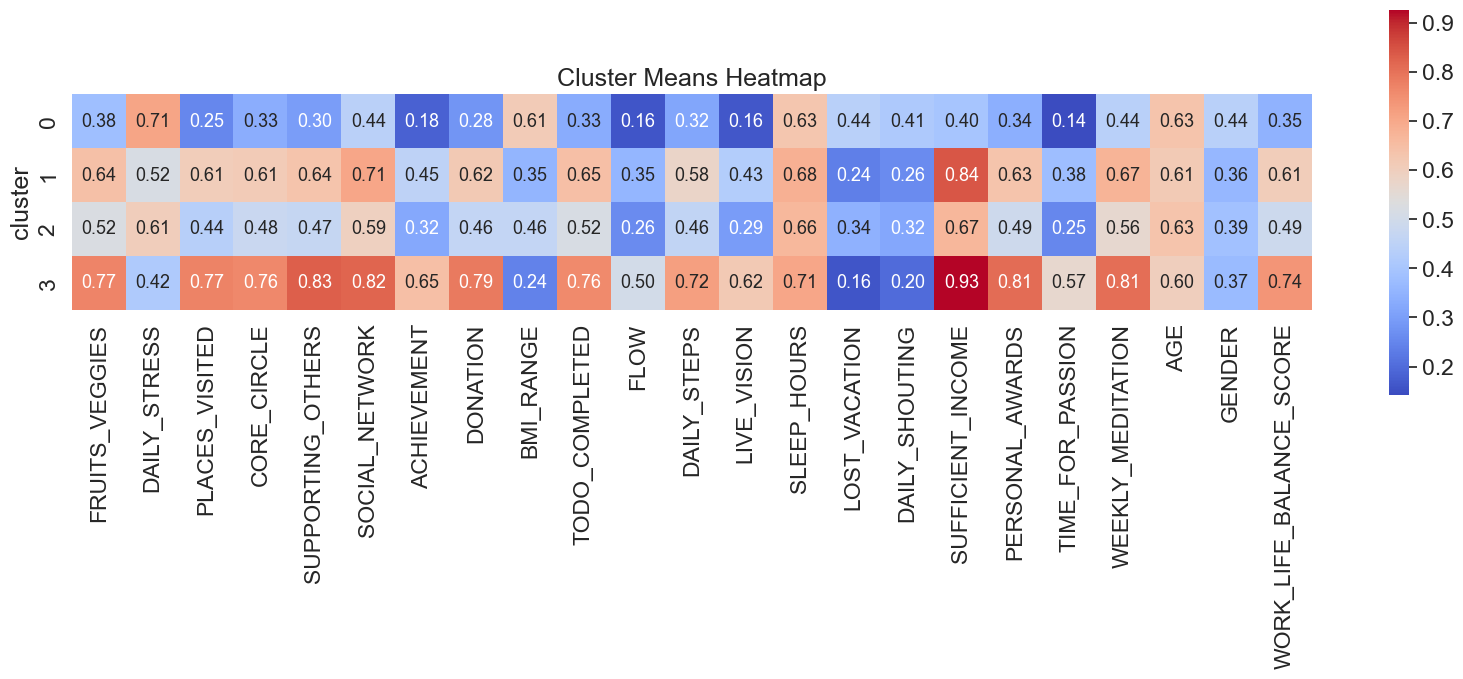

In [29]:
### cluster label에 대하여 각 항목의 값에 대한 평균을 구한다.

kmeans = KMeans(n_clusters=4)
normalized_df['cluster'] = kmeans.fit_predict(df)

cluster_menas = normalized_df.groupby('cluster').mean() ## cluster별로 묶어서 평균을 구하고자 함.
plt.figure(figsize=(20,5))
sns.set(font_scale=1.5)
sns.heatmap(cluster_menas,annot=True,cmap='coolwarm',fmt='.2f', 
            square=True,annot_kws={'size': 13},cbar=True)
plt.title('Cluster Means Heatmap')
plt.show()


각 cluster의 label에 따른 평균 값을 보여주는 그래프이다.

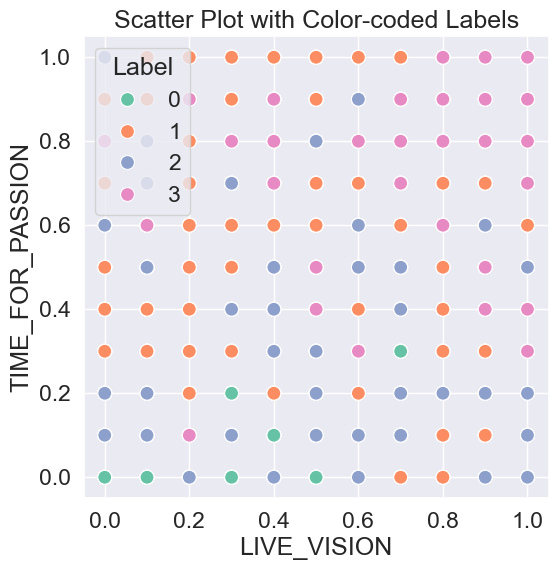

In [31]:
### normalized_df에 대한 그래프
def plot_graph_nor(xData,yData):
    plt.figure(figsize=(6, 6))
    
    sns.scatterplot(data=normalized_df, x=xData, y=yData, hue='cluster', palette='Set2', s=100)

    plt.title('Scatter Plot with Color-coded Labels')
    plt.xlabel(xData)
    plt.ylabel(yData)

    # 범례 추가
    plt.legend(title='Label')

    # 그래프 보여주기
    plt.show()
xData = 'LIVE_VISION'
yData = 'TIME_FOR_PASSION'

plot_graph_nor(xData,yData)


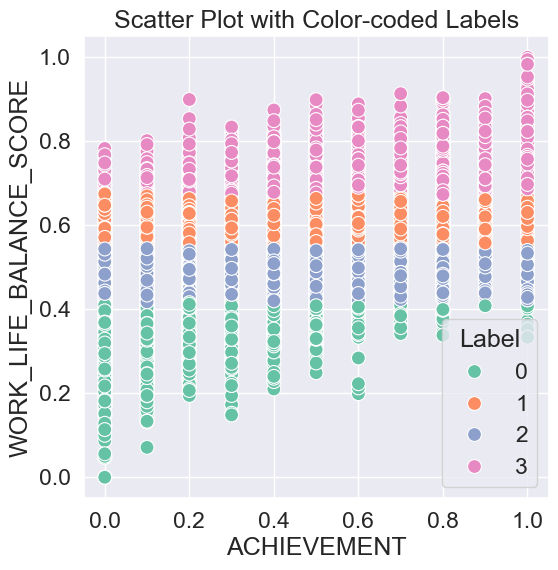

In [32]:
xData = 'ACHIEVEMENT'
yData = 'WORK_LIFE_BALANCE_SCORE'

plot_graph_nor(xData,yData)